# LensFlare - NumPy Implementation

LensFlare is an educational deep learning library for understanding neural networks. The code is based on work from the [Coursera deeplearning.ai course](https://www.coursera.org/specializations/deep-learning).

This notebook demonstrates the **pure NumPy implementation** which provides maximum educational transparency by implementing all neural network operations from scratch.

## Features
- **Pure NumPy** - no deep learning framework dependencies
- **Educational low-level API** showing explicit forward/backward propagation
- **sklearn-style interface** with `fit()`, `predict()`, `transform()`

In [1]:
from lensflare import NpNNClassifier, load_moons_dataset, plot_decision_boundary

## Load the Moons Dataset

The moons dataset is a simple binary classification problem useful for visualizing decision boundaries.

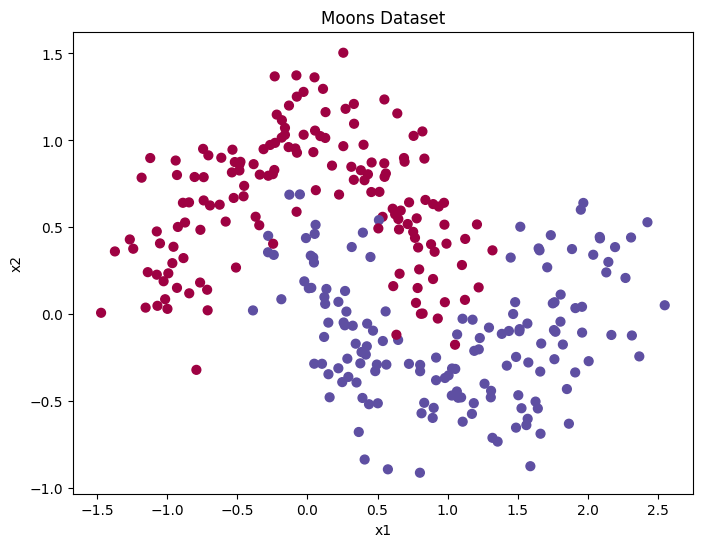

Data shape: X=(2, 300), y=(1, 300)


In [2]:
# Load data (set plot=True to visualize)
X_train, y_train = load_moons_dataset(n_samples=300, noise=0.2, seed=42, plot=True)
print(f"Data shape: X={X_train.shape}, y={y_train.shape}")

## Create and Train the Neural Network

The `NpNNClassifier` implements all neural network operations in pure NumPy, making it ideal for educational purposes.

### Parameters:
- `layers_dims`: Network architecture `[input_size, hidden1, hidden2, ..., output_size]`
- `optimizer`: `'gd'` (SGD), `'momentum'`, or `'adam'`
- `lambd`: L2 regularization strength
- `keep_prob`: Dropout keep probability (1.0 = no dropout)

In [3]:
# Define network architecture: 2 inputs -> 32 -> 16 -> 1 output
layers_dims = [X_train.shape[0], 32, 16, 1]

# Create classifier with Adam optimizer and L2 regularization
clf = NpNNClassifier(
    layers_dims=layers_dims,
    optimizer="adam",
    alpha=0.01,           # Learning rate
    lambd=0.01,           # L2 regularization
    num_epochs=2000,
    print_cost=True
)

# Train the model
clf.fit(X_train, y_train, seed=1)

Cost after epoch 0: 0.485310
Cost after epoch 1000: 0.060367


## Evaluate Training Accuracy

In [4]:
# Get predictions and print accuracy
y_pred_train = clf.transform(X_train, y_train)

Training Accuracy: 0.99


## Visualize the Decision Boundary

The decision boundary shows how the neural network separates the two classes.

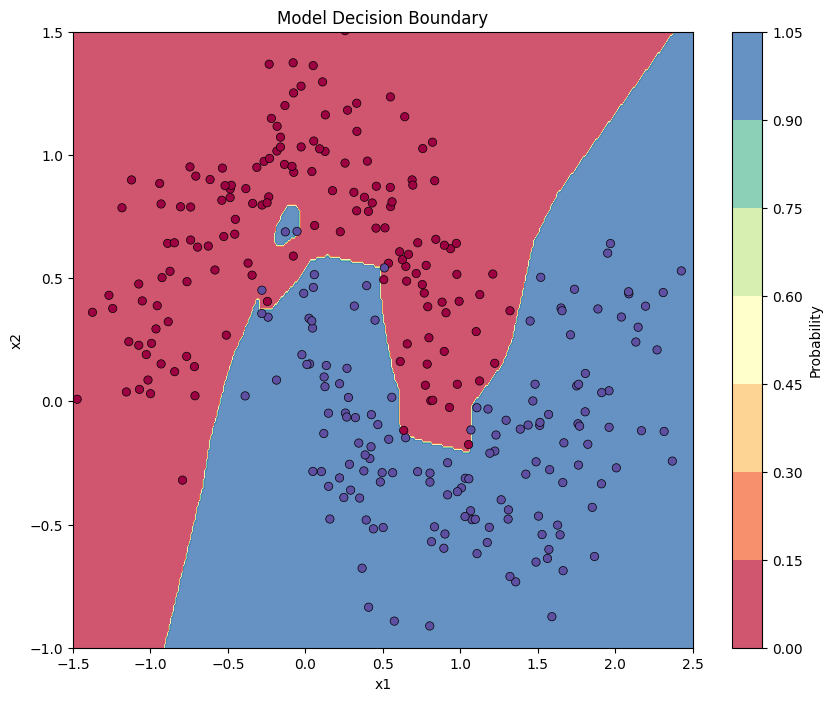

In [5]:
# Plot the decision boundary
plot_decision_boundary(clf, X_train, y_train)

## Plot Training Cost

Visualize how the loss decreased during training.

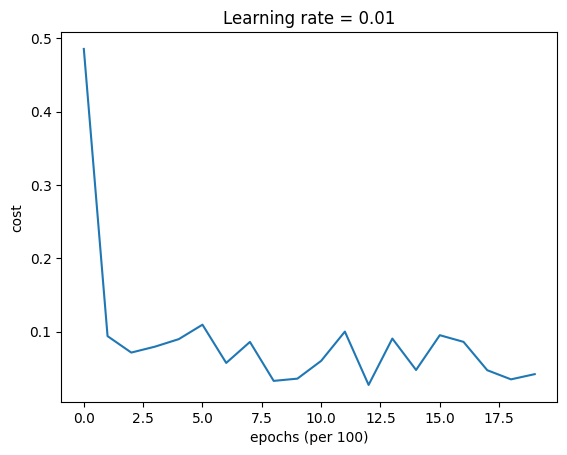

In [6]:
clf.plot_costs()

## Accessing Model Internals

For educational purposes, you can inspect the trained weights:

In [7]:
# View the learned parameters
for key, value in clf.parameters_.items():
    print(f"{key}: shape={value.shape}")

W1: shape=(32, 2)
b1: shape=(32, 1)
W2: shape=(16, 32)
b2: shape=(16, 1)
W3: shape=(1, 16)
b3: shape=(1, 1)
